# Vector and Its Operations

```{contents}
:local:
```

In [1]:
%config InlineBackend.figure_format = 'svg'

from __future__ import annotations

import math
import sys
from pathlib import Path
from typing import Optional, Sequence, TypeVar

import matplotlib.pyplot as plt
import numpy as np
import rich
from IPython.display import display

def find_root_dir(current_path: Path | None = None, marker: str = '.git') -> Path | None:
    """
    Find the root directory by searching for a directory or file that serves as a
    marker.

    Parameters
    ----------
    current_path : Path | None
        The starting path to search from. If None, the current working directory
        `Path.cwd()` is used.
    marker : str
        The name of the file or directory that signifies the root.

    Returns
    -------
    Path | None
        The path to the root directory. Returns None if the marker is not found.
    """
    if not current_path:
        current_path = Path.cwd()
    current_path = current_path.resolve()
    for parent in [current_path, *current_path.parents]:
        if (parent / marker).exists():
            return parent
    return None

root_dir = find_root_dir(marker='omnivault')

if root_dir is not None:
    sys.path.append(str(root_dir))
    from omnivault.utils.visualization.style import use_svg_display
    from omnivault.linear_algebra.plotter import (
        VectorPlotter2D,
        VectorPlotter3D,
        add_vectors_to_plotter,
        add_text_annotations,
    )
    from omnivault.linear_algebra.vector import Vector2D, Vector3D
else:
    raise ImportError("Root directory not found.")

use_svg_display()

## Learning Objectives

1. **Understand _Vector Addition and Subtraction_**: Grasp the concepts of
   vector addition and subtraction, both algebraically and geometrically, in the
   $D$-dimensional real number space $\mathbb{R}^D$.

2. **Comprehend _Algebraic Definitions_**: Familiarize with the algebraic
   definitions of vector addition, subtraction, and scalar-vector
   multiplication, understanding how these operations are performed
   component-wise.

3. **Visualize _Geometric Interpretation_ of Vector Operations**: Learn to
   visualize and interpret the geometric implications of vector addition and
   subtraction, especially in a 2D context for clarity.

4. **Recognize the _Vector Addition is Commutative_**: Acknowledge that vector
   addition is commutative in nature, implying that the order of addition does
   not affect the resultant vector.

5. **Explore _Scalar-Vector Multiplication_**: Understand the process and
   implications of multiplying a vector by a scalar, both in terms of algebraic
   representation and geometric scaling.

6. **Understand _Direction Preservation_ in Scalar Multiplication**: Recognize
   that scalar multiplication of a vector alters its magnitude but preserves its
   direction, except in cases of negative scaling where the direction is
   reversed.

7. **Discover _Commutativity in Scalar-Vector Multiplication_**: Learn about the
   commutative property of scalar-vector multiplication, which allows the scalar
   to multiply the vector from either side, resulting in the same outcome.

## Vector Addition and Subtraction

### Algebraic Definition

```{prf:definition} Algebraic Definition (Vector Addition and Subtraction)
:label: 02-vector-operation-vector-addition-algebraic-definition

For any vectors **$\mathbf{u}, \mathbf{v} \in \mathbb{R}^D$**, where
**$\mathbb{R}^D$** represents the D-dimensional
[real number space](https://en.wikipedia.org/wiki/Real_coordinate_space), the
operations of **vector addition** and **vector subtraction** are defined
component-wise as follows:

$$
\mathbf{u} \pm \mathbf{v} = \begin{bmatrix} u_1 \pm v_1 \\ u_2 \pm v_2 \\ \vdots \\ u_D \pm v_D \end{bmatrix},
$$

where $\mathbf{u} = \begin{bmatrix} u_1 \\ u_2 \\ \vdots \\ u_D \end{bmatrix}
$
and $\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_D \end{bmatrix}
$ are
column vectors in **$\mathbb{R}^D$**. Each component of the resulting vector is
the sum (or difference, depending on the operation) of the corresponding
components of **$\mathbf{u}$** and **$\mathbf{v}$**. Specifically, the $i$-th
component of the resultant vector $\mathbf{u} \pm
\mathbf{v}$ is given by
$u_d \pm v_d$, for each $d \in \{1, 2, \ldots,
D\}$.
```

### Geometric Interpretation

In exploring the geometric intuition behind vector addition and subtraction,
let's consider vectors in a D-dimensional space, particularly focusing on 2D for
visualization.

```{math}
:label: 02-vector-operation-vector-addition-example-1

\mathbf{u} =
\begin{bmatrix}
4 \\
7
\end{bmatrix}, \quad \mathbf{v} =
\begin{bmatrix}
8 \\
4
\end{bmatrix}
```

```{prf:example} Vector Addition
:label: 02-vector-operation-vector-addition-example

To add vectors $\mathbf{u}$ and $\mathbf{v}$, start by placing both vectors with
their tails at the origin as shown in
{numref}`02-vector-operation-vector-addition`. One approach is to extend vector
$\mathbf{u}$ by moving 8 units right (along the x-axis) and 4 units up (along
the y-axis) from the head of $\mathbf{u}$. This results in
$\mathbf{u} + \mathbf{v} = \begin{bmatrix} 12 \\ 11 \end{bmatrix}$.

Alternatively, apply the **head-to-tail method** by placing the tail of
$\mathbf{v}$ at the head of $\mathbf{u}$. The key concept here is that vectors
are free entities in space, characterized solely by their direction and
magnitude. Hence, translating vector $\mathbf{v}$ to the head of $\mathbf{u}$
does not change its essence. The resultant vector from the origin to the new
head position of $\mathbf{v}$ is $\mathbf{u} + \mathbf{v}$.
```

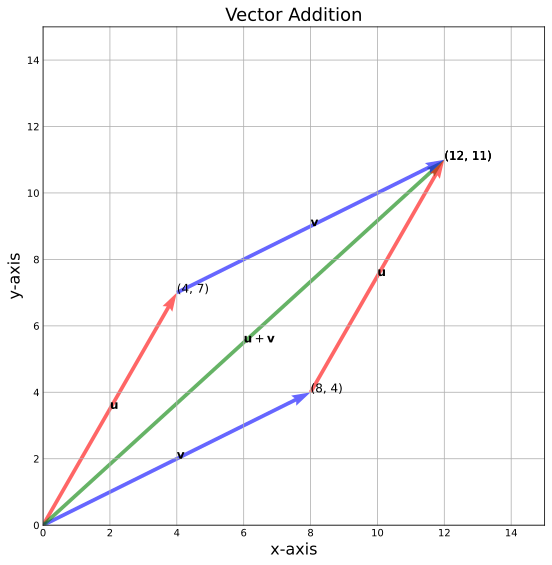

In [2]:
# Create plot using VectorPlotter2D
fig, ax = plt.subplots(figsize=(9, 9))

plotter = VectorPlotter2D(
    fig=fig,
    ax=ax,
    ax_kwargs={
        "set_xlim": {"left": 0, "right": 15},
        "set_ylim": {"bottom": 0, "top": 15},
        "set_xlabel": {"xlabel": "x-axis", "fontsize": 16},
        "set_ylabel": {"ylabel": "y-axis", "fontsize": 16},
        "set_title": {"label": "Vector Addition", "size": 18},
    },
)


# Define vectors and colors
vectors = [
    Vector2D(origin=(0, 0), direction=(4, 7), color="r", label="$\mathbf{u}$"),
    Vector2D(origin=(0, 0), direction=(8, 4), color="b", label="$\mathbf{v}$"),
    Vector2D(origin=(0, 0), direction=(12, 11), color="g", label="$\mathbf{u} + \mathbf{v}$"),
    Vector2D(origin=(4, 7), direction=(8, 4), color="b", label="$\mathbf{v}$"),
    Vector2D(origin=(8, 4), direction=(4, 7), color="r", label="$\mathbf{u}$"),
]

add_vectors_to_plotter(plotter, vectors)
add_text_annotations(plotter, vectors)

# Plot and show
plotter.plot()
save_path = Path("./assets/02-vector-operation-addition.svg")
if not save_path.exists():
    plotter.save(save_path)

```{figure} ./assets/02-vector-operation-addition.svg
---
name: 02-vector-operation-vector-addition
---

Vector addition; By Hongnan G.
```

For the sake of displaying completeness of vector addition in 3D, let's look at
how we can plot it with our code base:

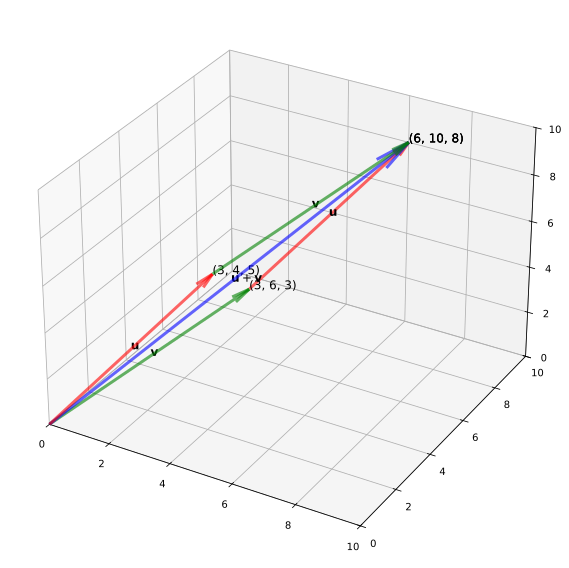

In [3]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection="3d")

quiver_kwargs = {
    "length": 1,
    "normalize": False,
    "alpha": 0.6,
    "arrow_length_ratio": 0.08,
    "pivot": "tail",
    "linestyles": "solid",
    "linewidths": 3,
}

plotter3d = VectorPlotter3D(
    fig=fig,
    ax=ax,
    ax_kwargs={
        "set_xlim": {"left": 0, "right": 10},
        "set_ylim": {"bottom": 0, "top": 10},
        "set_zlim": {"bottom": 0, "top": 10},
    },
    quiver_kwargs=quiver_kwargs,
)
vectors = [
    Vector3D(origin=(0, 0, 0), direction=(3, 4, 5), color="red", label="$\mathbf{u}$"),
    Vector3D(origin=(0, 0, 0), direction=(3, 6, 3), color="green", label="$\mathbf{v}$"),
    Vector3D(origin=(0, 0, 0), direction=(6, 10, 8), color="blue", label="$\mathbf{u} + \mathbf{v}$"),
    Vector3D(origin=(3, 6, 3), direction=(3, 4, 5), color="red", label="$\mathbf{u}$"),
    Vector3D(origin=(3, 4, 5), direction=(3, 6, 3), color="green", label="$\mathbf{v}$"),
]

add_vectors_to_plotter(plotter3d, vectors)
add_text_annotations(plotter3d, vectors)
plotter3d.plot(show_ticks=True)

```{prf:example} Vector Subtraction
:label: 02-vector-operation-vector-subtraction-example

To conceptualize vector subtraction, consider two methods realized by the
diagram in {numref}`02-vector-operation-vector-subtraction`.

- **First Method:** Recognize that $\mathbf{u} - \mathbf{v}$ is equivalent to
  $\mathbf{u} + (-\mathbf{v})$. Here,
  $-1 \cdot \mathbf{v} = \begin{bmatrix} -8 \\ -4 \end{bmatrix}$. Now, apply
  vector addition by placing the tail of $-\mathbf{v}$ at the head of
  $\mathbf{u}$. This method corresponds to the diagram's bottom left side.

- **Second Method:** Keep both vectors in their standard positions (origin as
  the tail) and draw a vector from the head of $\mathbf{v}$ to the head of
  $\mathbf{u}$. This resultant vector represents $\mathbf{u} - \mathbf{v}$. It's
  not in the standard position, but it geometrically represents the difference.
```

A noteworthy geometric property is that
$\mathbf{u} - \mathbf{v} = -(\mathbf{v} - \mathbf{u})$. This signifies that
geometrically, the vector $\mathbf{u} - \mathbf{v}$ is the vector
$\mathbf{v} - \mathbf{u}$ rotated by 180 degrees.

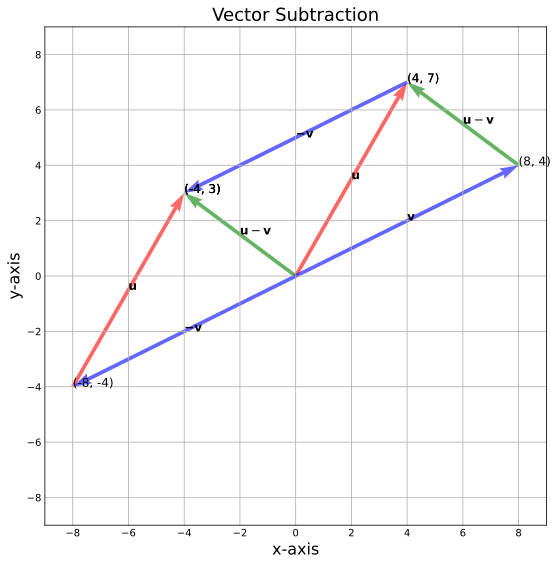

In [4]:
# Create plot using VectorPlotter2D
fig, ax = plt.subplots(figsize=(9, 9))

plotter = VectorPlotter2D(
    fig=fig,
    ax=ax,
    ax_kwargs={
        "set_xlim": {"left": -9, "right": 9},
        "set_ylim": {"bottom": -9, "top": 9},
        "set_xlabel": {"xlabel": "x-axis", "fontsize": 16},
        "set_ylabel": {"ylabel": "y-axis", "fontsize": 16},
        "set_title": {"label": "Vector Subtraction", "size": 18},
    },
)

# Define vectors and colors
vectors = [
    Vector2D(origin=(0, 0), direction=(4, 7), color="r", label="$\mathbf{u}$"),
    Vector2D(origin=(0, 0), direction=(8, 4), color="b", label="$\mathbf{v}$"),
    Vector2D(origin=(0, 0), direction=(-4, 3), color="g", label="$\mathbf{u} - \mathbf{v}$"),
    Vector2D(origin=(-8, -4), direction=(4, 7), color="r", label="$\mathbf{u}$"),
    Vector2D(origin=(0, 0), direction=(-8, -4), color="b", label="$\mathbf{-v}$"),
    Vector2D(origin=(4, 7), direction=(-8, -4), color="b", label="$\mathbf{-v}$"),
    Vector2D(origin=(8, 4), direction=(-4, 3), color="g", label="$\mathbf{u} - \mathbf{v}$"),
]

add_vectors_to_plotter(plotter, vectors)
add_text_annotations(plotter, vectors)

# Plot and show
plotter.plot()
save_path = Path("./assets/02-vector-operation-subtraction.svg")
if not save_path.exists():
    plotter.save(save_path)

```{figure} ./assets/02-vector-operation-subtraction.svg
---
name: 02-vector-operation-vector-subtraction
---

Vector subtraction; By Hongnan G.
```

We can also use code to combine them to a subplot:

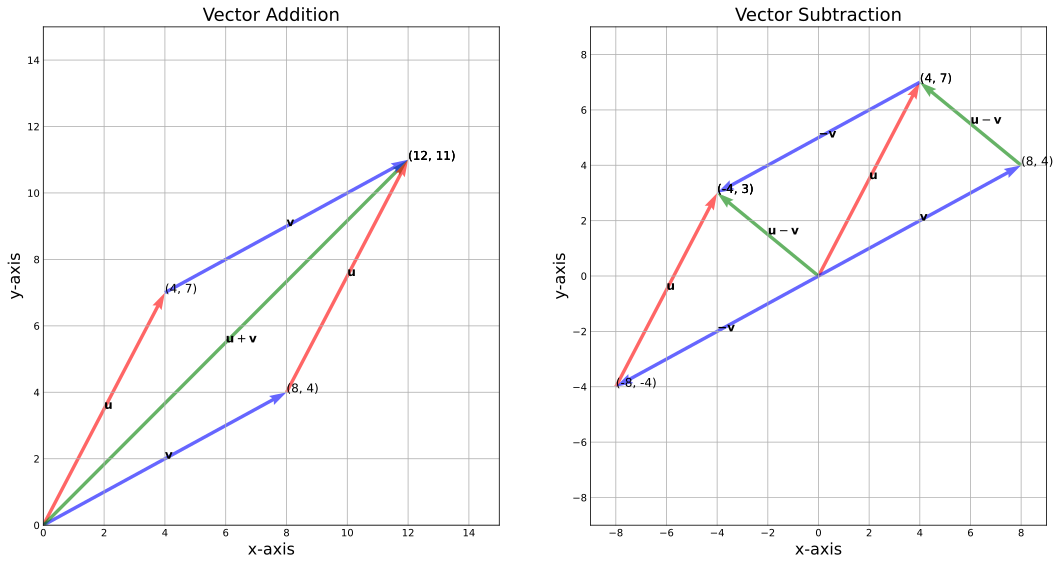

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))

plotter_add = VectorPlotter2D(
    fig=fig,
    ax=axes[0],
    ax_kwargs={
        "set_xlim": {"left": 0, "right": 15},
        "set_ylim": {"bottom": 0, "top": 15},
        "set_xlabel": {"xlabel": "x-axis", "fontsize": 16},
        "set_ylabel": {"ylabel": "y-axis", "fontsize": 16},
        "set_title": {"label": "Vector Addition", "size": 18},
    },
)

vectors_add = [
    Vector2D(origin=(0, 0), direction=(4, 7), color="r", label="$\mathbf{u}$"),
    Vector2D(origin=(0, 0), direction=(8, 4), color="b", label="$\mathbf{v}$"),
    Vector2D(origin=(0, 0), direction=(12, 11), color="g", label="$\mathbf{u} + \mathbf{v}$"),
    Vector2D(origin=(4, 7), direction=(8, 4), color="b", label="$\mathbf{v}$"),
    Vector2D(origin=(8, 4), direction=(4, 7), color="r", label="$\mathbf{u}$"),
]

add_vectors_to_plotter(plotter_add, vectors_add)
add_text_annotations(plotter_add, vectors_add)

plotter_add.plot()

plotter_sub = VectorPlotter2D(
    fig=fig,
    ax=axes[1],
    ax_kwargs={
        "set_xlim": {"left": -9, "right": 9},
        "set_ylim": {"bottom": -9, "top": 9},
        "set_xlabel": {"xlabel": "x-axis", "fontsize": 16},
        "set_ylabel": {"ylabel": "y-axis", "fontsize": 16},
        "set_title": {"label": "Vector Subtraction", "size": 18},
    },
)

vectors_sub = [
    Vector2D(origin=(0, 0), direction=(4, 7), color="r", label="$\mathbf{u}$"),
    Vector2D(origin=(0, 0), direction=(8, 4), color="b", label="$\mathbf{v}$"),
    Vector2D(origin=(0, 0), direction=(-4, 3), color="g", label="$\mathbf{u} - \mathbf{v}$"),
    Vector2D(origin=(-8, -4), direction=(4, 7), color="r", label="$\mathbf{u}$"),
    Vector2D(origin=(0, 0), direction=(-8, -4), color="b", label="$\mathbf{-v}$"),
    Vector2D(origin=(4, 7), direction=(-8, -4), color="b", label="$\mathbf{-v}$"),
    Vector2D(origin=(8, 4), direction=(-4, 3), color="g", label="$\mathbf{u} - \mathbf{v}$"),
]

add_vectors_to_plotter(plotter_sub, vectors_sub)
add_text_annotations(plotter_sub, vectors_sub)

plotter_sub.plot()

### Vector Addition is Commutative

In the realm of linear algebra, before diving into the formal definition of a
[**vector space over a field**](https://en.wikipedia.org/wiki/Vector_space),
it's insightful to note a fundamental property of vector addition within such a
context. Suppose we have a set of vectors $\mathcal{V}$ defined over a field
$\mathbb{F}$. In this scenario, every vector in $\mathcal{V}$ exhibits
**commutative** properties in addition, as dictated by the definition of a field
in {prf:ref}`linear-algebra-01-preliminaries-field`.

Concretely, this means that for any two vectors
$\mathbf{u}, \mathbf{v} \in \mathcal{V}$, the operation of vector addition is
commutative; that is, $\mathbf{u} + \mathbf{v} = \mathbf{v} + \mathbf{u}$. This
property holds regardless of the dimension $D$ of the vectors.

## Scalar-Vector Multiplication

### Algebraic Definition

```{prf:definition} Algebraic Definition (Scalar-Vector Multiplication)
:label: 02-vector-operation-scalar-vector-multiplication-algebraic-definition

Given any vector $\mathbf{v} \in \mathbb{R}^D$ and a scalar
$\lambda \in \mathbb{R}$, the operation of multiplying the vector $\mathbf{v}$
by the scalar $\lambda$, denoted as $\lambda \mathbf{v}$, is defined as:


$$
\lambda \mathbf{v} = \begin{bmatrix} \lambda v_1 \\ \lambda v_2 \\ \vdots \\
\lambda v_D \end{bmatrix},
$$

where $\mathbf{v}$ is represented as
$\begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_D \end{bmatrix}$. This operation is
known as
**[Vector-Scalar Multiplication](https://en.wikipedia.org/wiki/Scalar_multiplication)**.
```

### Geometrical Definition

#### Positive Scaling

Scaling a vector positively is straightforward. For instance, consider the
vector $\mathbf{u} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$. When scaled by a
positive scalar, say $\lambda = 3$, the vector becomes:

$$
3\mathbf{u} = 3 \begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} 3 \\ 6
\end{bmatrix}.
$$

In this case, the magnitude of $\mathbf{u}$ increases by a factor of $3$, while
its direction remains unchanged. The resulting vector, $3\mathbf{u}$, points in
the same direction as the original but is three times longer.

#### Negative Scaling

Conversely, taking the same vector
$\mathbf{u} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ and scaling it by
$\lambda = -1$ yields:

$$
-1\mathbf{u} = -1 \begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} -1 \\
-2 \end{bmatrix}.
$$

Here, the negatively scaled vector $-\mathbf{u}$ points in the opposite
direction to $\mathbf{u}$. However, it's important to note that the
"orientation" of $\mathbf{u}$ in a broader sense remains unchanged; the line
along which $\mathbf{u}$ lies is preserved, and all scalar multiples of
$\mathbf{u}$, regardless of the sign, will lie on this line.

Let's look how the vector $\mathbf{u}$ and its scaled versions look like in a 2D
space:

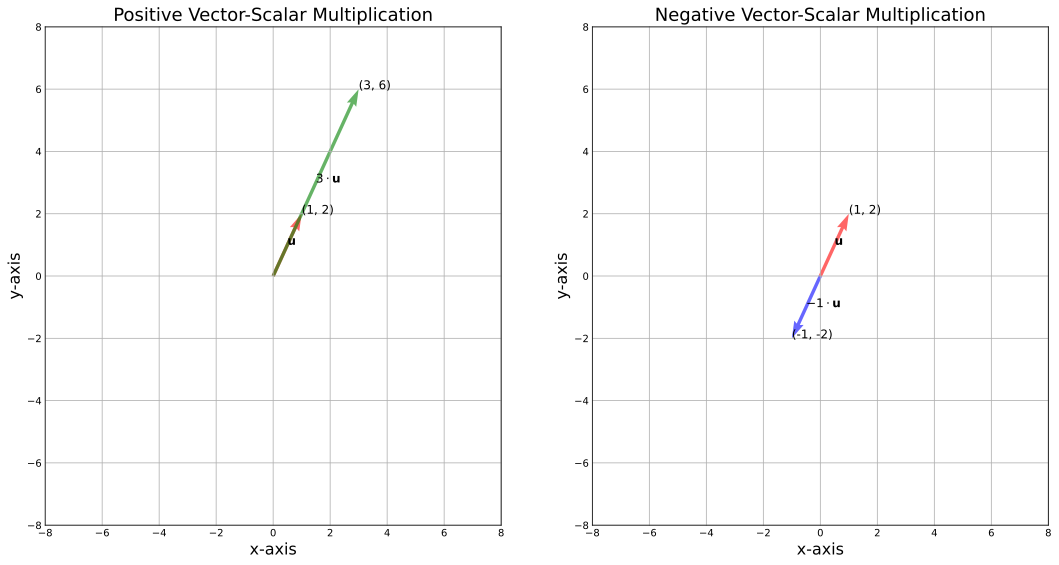

In [6]:
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Tuple, Optional, Dict

# Create a subplot for positive and negative scaling
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))

# Plot for Positive Scaling
plotter_pos = VectorPlotter2D(
    fig=fig,
    ax=axes[0],
    ax_kwargs={
        "set_xlim": {"left": -8, "right": 8},
        "set_ylim": {"bottom": -8, "top": 8},
        "set_xlabel": {"xlabel": "x-axis", "fontsize": 16},
        "set_ylabel": {"ylabel": "y-axis", "fontsize": 16},
        "set_title": {"label": "Positive Vector-Scalar Multiplication", "size": 18},
    },
)

original_vector = Vector2D(origin=(0, 0), direction=(1, 2), color="r", label="$\mathbf{u}$")
scaled_vector = Vector2D(origin=(0, 0), direction=(3, 6), color="g", label="$3 \cdot \mathbf{u}$")

add_vectors_to_plotter(plotter_pos, [original_vector, scaled_vector])
add_text_annotations(plotter_pos, [original_vector, scaled_vector])
plotter_pos.plot()

# Plot for Negative Scaling
plotter_neg = VectorPlotter2D(
    fig=fig,
    ax=axes[1],
    ax_kwargs={
        "set_xlim": {"left": -8, "right": 8},
        "set_ylim": {"bottom": -8, "top": 8},
        "set_xlabel": {"xlabel": "x-axis", "fontsize": 16},
        "set_ylabel": {"ylabel": "y-axis", "fontsize": 16},
        "set_title": {"label": "Negative Vector-Scalar Multiplication", "size": 18},
    },
)

negatively_scaled_vector = Vector2D(origin=(0, 0), direction=(-1, -2), color="b", label="$-1 \cdot \mathbf{u}$")

add_vectors_to_plotter(plotter_neg, [original_vector, negatively_scaled_vector])
add_text_annotations(plotter_neg, [original_vector, negatively_scaled_vector])
plotter_neg.plot()

### Vector-Scalar Multiplication is Invariant under Rotation

**Vector-scalar multiplication**, though conceptually straightforward, plays a
fundamental role in various applications within linear algebra, such as in the
context of
[**eigendecomposition**](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix).

As we have seen in the
{prf:ref}`02-vector-operation-scalar-vector-multiplication-algebraic-definition`,
this operation involves scaling a vector by a scalar factor, which alters the
vector's magnitude without changing its direction (geometrically we can see this
too). The result, $\lambda \mathbf{v}$, is a vector in the same direction as
$\mathbf{v}$ but scaled in magnitude by $\lambda$. This operation is significant
for several reasons:

1. **Preservation of Direction**: Unlike many other transformations,
   vector-scalar multiplication maintains the original direction of the vector,
   either stretching or compressing it along its existing line of action.

2. **Eigenvectors and Eigenvalues**: In the study of eigenvectors and
   eigenvalues, which are central to eigendecomposition, vector-scalar
   multiplication illustrates how certain vectors (eigenvectors) change only in
   magnitude, not direction, when a linear transformation is applied.

### Vector-Scalar Multiplication is Commutative

In linear algebra, the commutative property often associated with scalar
operations also applies to
**[vector-scalar multiplication](https://en.wikipedia.org/wiki/Scalar_multiplication)**,
but with a nuanced understanding. Specifically, for any vector
$\mathbf{v} \in
\mathbb{R}^D$ and scalar $\lambda \in \mathbb{R}$, the operation
of multiplying the vector by the scalar exhibits a form of commutativity. This
can be expressed as:

$$
\lambda \mathbf{v} = \begin{bmatrix} \lambda v_1 \\ \lambda v_2 \\ \vdots \\
\lambda v_D \end{bmatrix} = \begin{bmatrix} v_1 \lambda \\ v_2 \lambda \\ \vdots
\\ v_D \lambda \end{bmatrix} = \mathbf{v} \lambda.
$$

Here, $\lambda \mathbf{v}$ and $\mathbf{v} \lambda$ are mathematically
equivalent, indicating that the scalar can multiply the vector from either the
left or the right, yielding the same result. This property is particularly
important because it simplifies the manipulation and transformation of vectors
in various linear algebra applications, such as in matrix-vector multiplication
and transformations.

It's essential to note that while the scalar multiplication operation is
commutative, the multiplication of vectors (if defined, such as in dot or cross
products) does not necessarily follow the commutative property. Thus, the
commutativity in vector-scalar multiplication is a specific case, pertaining
only to the interaction between a scalar and a vector, not between two vectors.

## References and Further Readings

-   Axler, S. (1997). _Linear Algebra Done Right_. Springer New York. (Chapter
    1.A $\mathbb{R}^N$ and $\mathbb{C}^N$).